In [ ]:
!pip install fasttext
!pip install joblib
!pip install scikit-learn
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 965.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313504 sha256=e77b748c75dd5db2a47a373b45ce49fa384f63e15d5d3b98319ff4faa4510c14
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
import pandas as pd
import numpy as np
import fasttext
import fasttext.util
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

In [ ]:
fasttext.util.download_model('pl', if_exists='ignore')

'cc.pl.300.bin'

In [4]:
ft_model = fasttext.load_model('cc.pl.300.bin')

In [5]:
def get_ft_vector(text):
    return ft_model.get_sentence_vector(str(text))

In [19]:
def load_and_embed(file_path):
    df = pd.read_csv(file_path)
    df = df.dropna()
    X = np.vstack(df['text'].apply(get_ft_vector))
    y = df['label'].values
    categories = df['category'].values
    return X, y, categories

In [ ]:
def evaluate_model(model_path, X, y, categories, model_title):
    model = joblib.load(model_path)
    y_pred = model.predict(X)

    try:
        y_proba = model.predict_proba(X)[:, 1]
    except:
        y_proba = None

    print(f"\n=== {model_title} (Extreme Cases) ===")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred, average='macro'))
    print("Recall:", recall_score(y, y_pred, average='macro'))
    print("F1-score:", f1_score(y, y_pred, average='macro'))

    if y_proba is not None and len(np.unique(y)) == 2:
        roc_auc = roc_auc_score(y, y_proba)
        print("ROC-AUC:", roc_auc)

    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix for KNN - Full Processed Extreme Cases Dataset")
    plt.show()

    if y_proba is not None and len(np.unique(y)) == 2:
        fpr, tpr, _ = roc_curve(y, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"(AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve for KNN - Full Processeda Extreme Cases Dataset")
        plt.legend()
        plt.grid()
        plt.show()

    correct_mask = y_pred == y
    correct_categories = categories[correct_mask]

    unique_cats = sorted(np.unique(categories))
    counts = [np.sum(correct_categories == cat) for cat in unique_cats]

    # Wykres
    plt.figure(figsize=(8, 5))
    sns.barplot(x=unique_cats, y=counts, palette="viridis")
    plt.xlabel("Case Category (1–6)")
    plt.ylabel("Correct Predictions")
    plt.title(f"Correct Predictions per Category for XGBoost Model")
    plt.xticks(ticks=range(len(unique_cats)), labels=[str(c) for c in unique_cats])
    plt.grid(True, axis='y')

    for i, count in enumerate(counts):
        plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()

    print("\n--- Summary of Correct Predictions per Category ---")
    for cat in unique_cats:
        total = np.sum(categories == cat)
        correct = np.sum((categories == cat) & (y_pred == y))
        print(f"Kategoria {cat}: poprawnie {correct} na {total}")

In [39]:
X_full, y_full, cat_full = load_and_embed("extreme_examples_full.csv")


=== Random Forest - Full Processed (Extreme Cases) ===
Accuracy: 0.27586206896551724
Precision: 0.3308903789178232
Recall: 0.327116212338594
F1-score: 0.2757663847780127
ROC-AUC: 0.28598756575801054


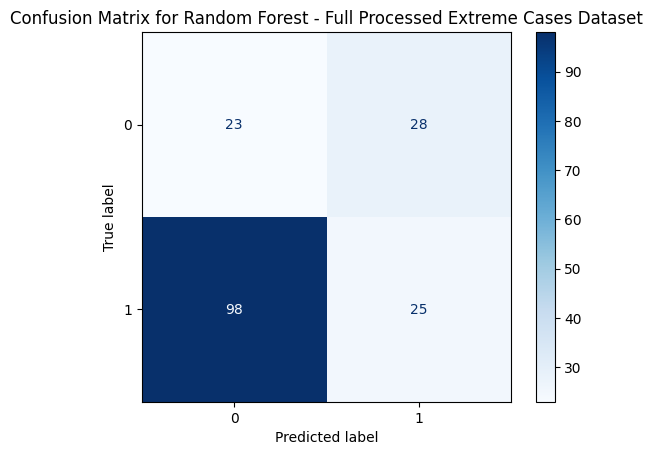

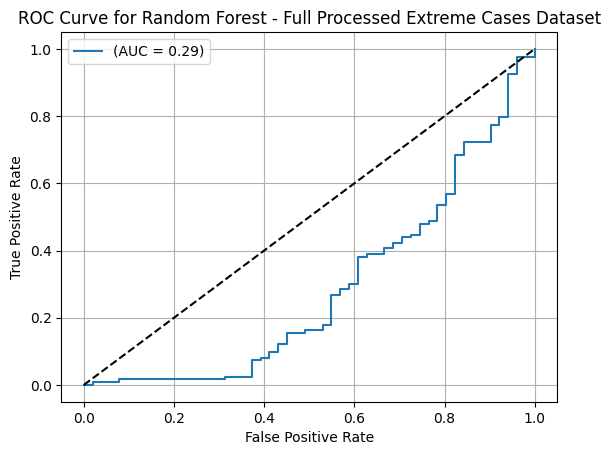

<ipython-input-38-6250d737e9f2>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_cats, y=counts, palette="viridis")


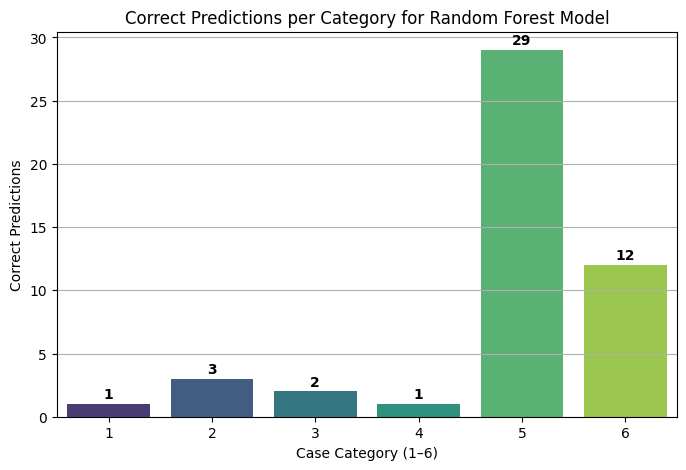


--- Summary of Correct Predictions per Category ---
Kategoria 1: poprawnie 1 na 24
Kategoria 2: poprawnie 3 na 25
Kategoria 3: poprawnie 2 na 25
Kategoria 4: poprawnie 1 na 25
Kategoria 5: poprawnie 29 na 50
Kategoria 6: poprawnie 12 na 25


In [40]:
evaluate_model("rf_model_fully processed data.joblib", X_full, y_full, cat_full, "Random Forest - Full Processed")

In [42]:
X_raw, y_raw, cat_raw = load_and_embed("extreme_examples_raw.csv")


=== SVM - Raw Data (Extreme Cases) ===
Accuracy: 0.3218390804597701
Precision: 0.3474747474747475
Recall: 0.3194643711142994
F1-score: 0.3086868686868687
ROC-AUC: 0.23688825123545354


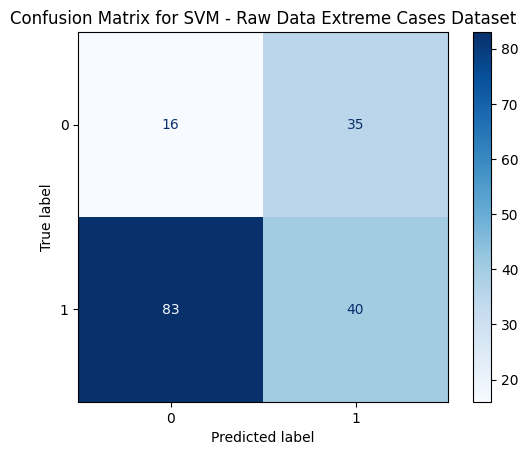

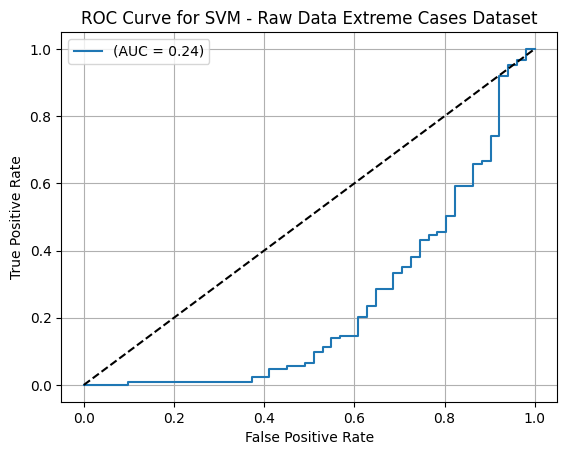

<ipython-input-41-a748e23d0239>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_cats, y=counts, palette="viridis")


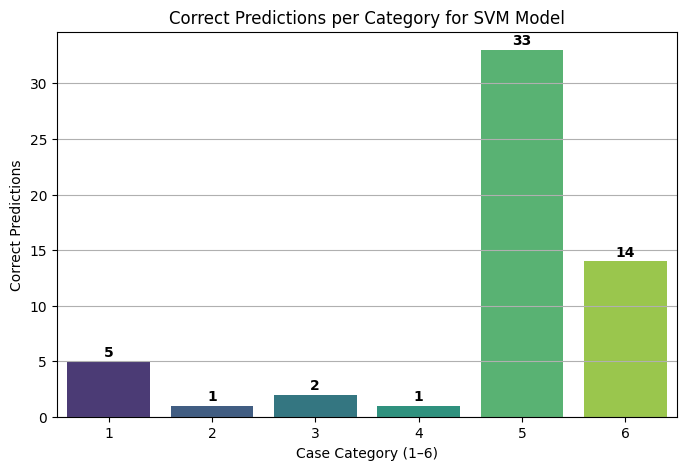


--- Summary of Correct Predictions per Category ---
Kategoria 1: poprawnie 5 na 24
Kategoria 2: poprawnie 1 na 25
Kategoria 3: poprawnie 2 na 25
Kategoria 4: poprawnie 1 na 25
Kategoria 5: poprawnie 33 na 50
Kategoria 6: poprawnie 14 na 25


In [43]:
evaluate_model("svm_model_raw data.joblib", X_raw, y_raw, cat_raw, "SVM - Raw Data")

In [53]:
X_full, y_full, cat_full = load_and_embed("extreme_examples_full.csv")


=== KNN - Full Processed (Extreme Cases) ===
Accuracy: 0.367816091954023
Precision: 0.3475016655562958
Recall: 0.31755141080822574
F1-score: 0.32462949894142556
ROC-AUC: 0.2545831340666348


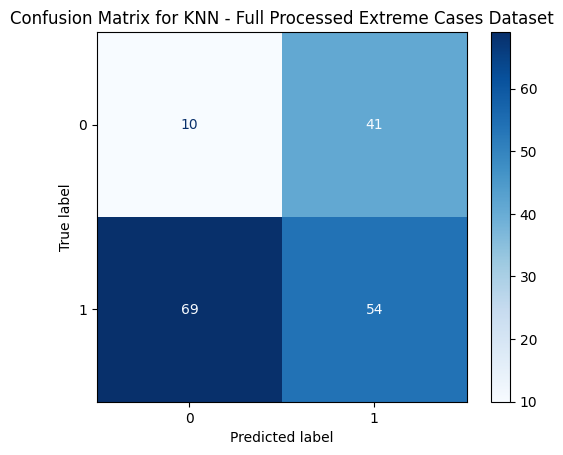

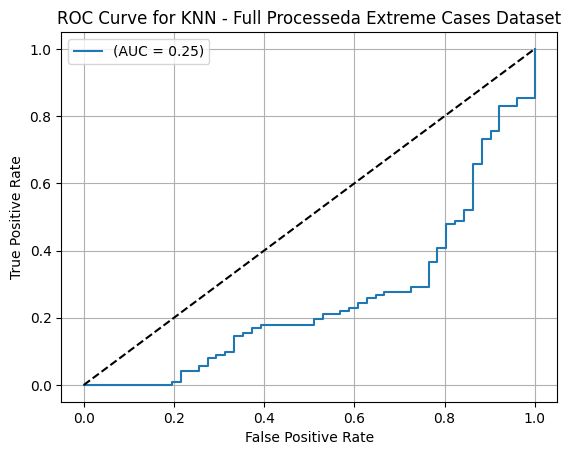

<ipython-input-52-241d5b508ffa>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_cats, y=counts, palette="viridis")


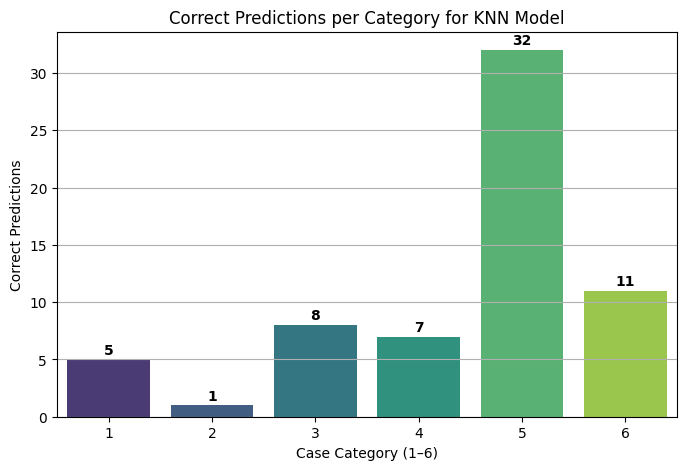


--- Summary of Correct Predictions per Category ---
Kategoria 1: poprawnie 5 na 24
Kategoria 2: poprawnie 1 na 25
Kategoria 3: poprawnie 8 na 25
Kategoria 4: poprawnie 7 na 25
Kategoria 5: poprawnie 32 na 50
Kategoria 6: poprawnie 11 na 25


In [54]:
evaluate_model("knn_model_fully processed data.joblib", X_full, y_full, cat_full, "KNN - Full Processed")

In [45]:
X_raw, y_raw, cat_raw = load_and_embed("extreme_examples_raw.csv")


=== XGBoost - Raw Data (Extreme Cases) ===
Accuracy: 0.3160919540229885
Precision: 0.3472222222222222
Recall: 0.32113821138211385
F1-score: 0.305982905982906
ROC-AUC: 0.27769807109835803


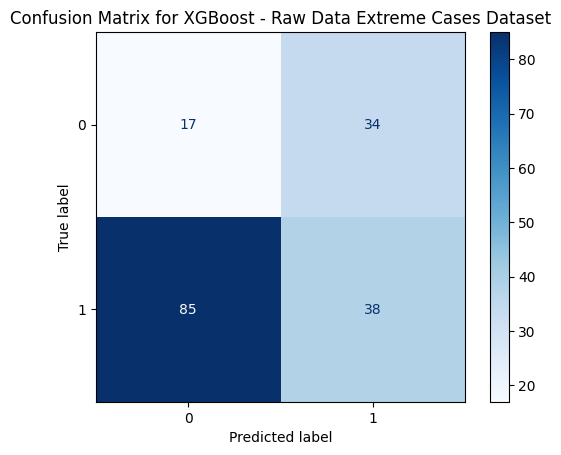

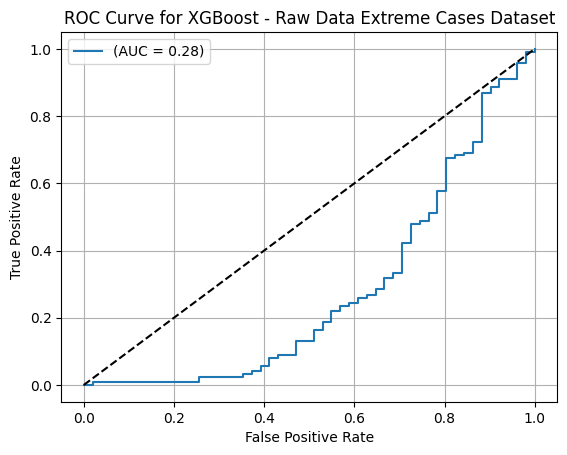

<ipython-input-44-a6690f4d1c92>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_cats, y=counts, palette="viridis")


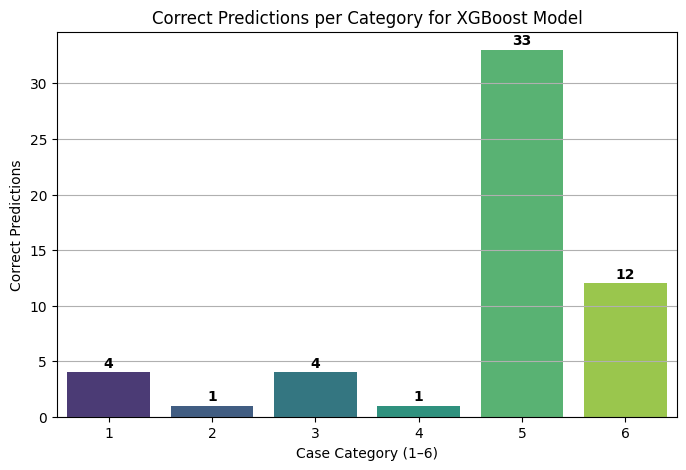


--- Summary of Correct Predictions per Category ---
Kategoria 1: poprawnie 4 na 24
Kategoria 2: poprawnie 1 na 25
Kategoria 3: poprawnie 4 na 25
Kategoria 4: poprawnie 1 na 25
Kategoria 5: poprawnie 33 na 50
Kategoria 6: poprawnie 12 na 25


In [48]:
evaluate_model("xgb_model_raw data.joblib", X_raw, y_raw, cat_raw, "XGBoost - Raw Data")